# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline #so that we dont have to write plt.show() everytime

# Importing Dataset

In [2]:
df_orig = pd.read_csv("uti_dataset.csv")

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Understanding Dataset

**Setting ID columns as Index**

In [3]:
df_orig = df_orig.set_index(['ID', 'PATID'])

In [4]:
df_orig.head()

,,UCX_abnormal,ua_bacteria,ua_bili,ua_blood,ua_clarity,ua_color,ua_epi,ua_glucose,ua_ketones,ua_leuk,...,SKIN_PREPS,SMOKING_DETERRENTS,THYROID_PREPS,UNCLASSIFIED_DRUG_PRODUCTS,VITAMINS,dispo,UTI_diag,split,abxUTI,alt_diag
ID,PATID,,,,,,,,,,,,,,,,,,,,,
1,1,yes,few,negative,negative,clear,yellow,small,negative,negative,small,...,No,No,No,No,No,Admit,Yes,training,yes,0
2,1,no,many,negative,small,clear,yellow,NaN,negative,negative,negative,...,No,No,No,No,Yes,Admit,Yes,training,yes,0
3,2,yes,few,negative,negative,clear,yellow,small,negative,negative,small,...,No,No,Yes,Yes,No,Discharge,No,training,no,0
4,3,yes,many,negative,negative,not_clear,yellow,NaN,negative,negative,large,...,No,No,No,No,Yes,Admit,Yes,training,yes,0
5,4,no,moderate,small,negative,clear,orange,NaN,negative,small,small,...,No,No,No,No,No,AMA,No,training,no,0


# Handling Missing Values

In [5]:
def missing_handler(df, column):
    df[column] = df[column].replace(np.NaN, df[column].mode()[0])
    
for i in df_orig.columns:
    missing_handler(df_orig, i)    

In [6]:
df_orig.head()

,,UCX_abnormal,ua_bacteria,ua_bili,ua_blood,ua_clarity,ua_color,ua_epi,ua_glucose,ua_ketones,ua_leuk,...,SKIN_PREPS,SMOKING_DETERRENTS,THYROID_PREPS,UNCLASSIFIED_DRUG_PRODUCTS,VITAMINS,dispo,UTI_diag,split,abxUTI,alt_diag
ID,PATID,,,,,,,,,,,,,,,,,,,,,
1,1,yes,few,negative,negative,clear,yellow,small,negative,negative,small,...,No,No,No,No,No,Admit,Yes,training,yes,0
2,1,no,many,negative,small,clear,yellow,small,negative,negative,negative,...,No,No,No,No,Yes,Admit,Yes,training,yes,0
3,2,yes,few,negative,negative,clear,yellow,small,negative,negative,small,...,No,No,Yes,Yes,No,Discharge,No,training,no,0
4,3,yes,many,negative,negative,not_clear,yellow,small,negative,negative,large,...,No,No,No,No,Yes,Admit,Yes,training,yes,0
5,4,no,moderate,small,negative,clear,orange,small,negative,small,small,...,No,No,No,No,No,AMA,No,training,no,0


# Handling a numeric column which has categorical values

In [7]:
df_orig[['ua_ph']] = df_orig[['ua_ph']].apply(pd.to_numeric, errors='coerce')
# df_orig = df_orig[np.isfinite(pd.to_numeric(df_orig['ua_ph'], errors="coerce"))]

df_orig['ua_ph'] = df_orig['ua_ph'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Dropping all the rows with nan values
df_orig['ua_ph'] = df_orig['ua_ph'].dropna(inplace=True)

# Splitting Data Into Categorical and Numerical Features

In [8]:
numerics = ['int16', 'int32', 'int64', 'float64']
df_num = df_orig.select_dtypes(include=numerics)    

df_categ = df_orig.select_dtypes(include='O')

In [9]:
df_categ.head()

,,UCX_abnormal,ua_bacteria,ua_bili,ua_blood,ua_clarity,ua_color,ua_epi,ua_glucose,ua_ketones,ua_leuk,...,SEDATIVE_HYPNOTICS,SKIN_PREPS,SMOKING_DETERRENTS,THYROID_PREPS,UNCLASSIFIED_DRUG_PRODUCTS,VITAMINS,dispo,UTI_diag,split,abxUTI
ID,PATID,,,,,,,,,,,,,,,,,,,,,
1,1,yes,few,negative,negative,clear,yellow,small,negative,negative,small,...,No,No,No,No,No,No,Admit,Yes,training,yes
2,1,no,many,negative,small,clear,yellow,small,negative,negative,negative,...,No,No,No,No,No,Yes,Admit,Yes,training,yes
3,2,yes,few,negative,negative,clear,yellow,small,negative,negative,small,...,Yes,No,No,Yes,Yes,No,Discharge,No,training,no
4,3,yes,many,negative,negative,not_clear,yellow,small,negative,negative,large,...,No,No,No,No,No,Yes,Admit,Yes,training,yes
5,4,no,moderate,small,negative,clear,orange,small,negative,small,small,...,No,No,No,No,No,No,AMA,No,training,no


In [10]:
df_num.head()

,,ua_spec_grav,CVA_tenderness,abd_tenderness,abd_soft,abd_distended,abd_gaurding,abd_mass,abd_rebound,abd_rigidity,back_pain,...,Monocytes,MPV,Neutrophils,Platelets,Potassium,RBC,RDW,Sodium,WBC,alt_diag
ID,PATID,,,,,,,,,,,,,,,,,,,,,
1,1,1.020,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,4.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2,1,1.017,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,5.0,2.0,1.0,1.0,2.0,2.0,3.0,0
3,2,1.016,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,5.0,3.0,1.0,1.0,4.0,1.0,1.0,0
4,3,1.016,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,5.0,1.0,1.0,5.0,2.0,2.0,4.0,0
5,4,1.030,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,4.0,2.0,5.0,2.0,1.0,1.0,2.0,4.0,4.0,0


# Handling Outliers

In [11]:
def outlier_handler(df, column):
  q1, q3 = np.percentile(df[column], [25, 75])
  iqr = q3 - q1;
  lb = q1 - iqr*1.5
  ub = q3 + iqr*1.5

  df.loc[df[column]>ub, column] = ub
  df.loc[df[column]<lb, column] = lb

In [12]:
for i in df_num.columns:
    outlier_handler(df_num, i)

/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


# Encoding

In [13]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

def lab_enc(df, column):
    df[column]= label_encoder.fit_transform(df[column])

for i in df_categ.columns:
    lab_enc(df_categ, i)

<ipython-input-13-fe3a3f257f2f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column]= label_encoder.fit_transform(df[column])
<ipython-input-13-fe3a3f257f2f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column]= label_encoder.fit_transform(df[column])
<ipython-input-13-fe3a3f257f2f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [14]:
df_orig_2 = pd.concat([df_categ, df_num], axis=1)

# Exploratory Data Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '1.01'),
  Text(1, 0, '1.011'),
  Text(2, 0, '1.012'),
  Text(3, 0, '1.014'),
  Text(4, 0, '1.015'),
  Text(5, 0, '1.016'),
  Text(6, 0, '1.017'),
  Text(7, 0, '1.019'),
  Text(8, 0, '1.02'),
  Text(9, 0, '1.023'),
  Text(10, 0, '1.025'),
  Text(11, 0, '1.026'),
  Text(12, 0, '1.027'),
  Text(13, 0, '1.028'),
  Text(14, 0, '1.03')])

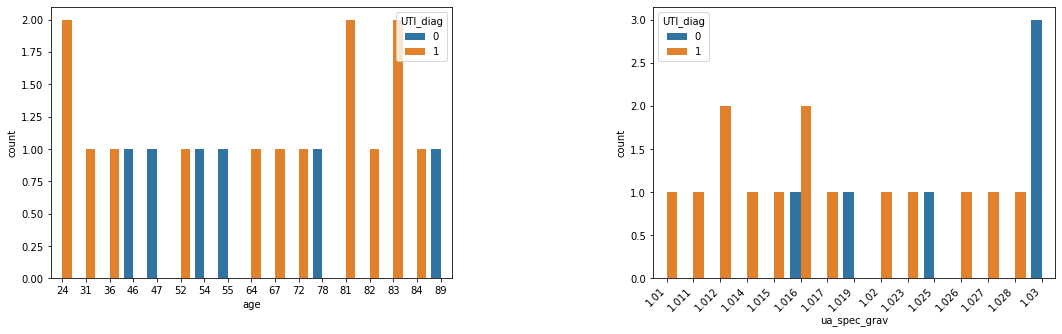

In [81]:
new_df = df_orig_2.head(20)

plt.figure(figsize=(18, 5))
plt.subplots_adjust(wspace=0.5, hspace=0)

plt.subplot(1, 2, 1)
sns.countplot(x='age', hue='UTI_diag', data=new_df)

plt.subplot(1, 2, 2)
sns.countplot(x='ua_spec_grav', hue='UTI_diag', data=new_df)
plt.xticks(rotation=45, ha="right")

# Analysis:

**1. We can see that ages around 80 and 25 have high chances of getting infected with UTI disease.**

**2. We can observe that people having Urine Specific Gravity values 1.016 and 1.012 have more chance of contracting UTI while people having Urine Specific Gravity value 1.03 have lower chances of contracting UTI.**

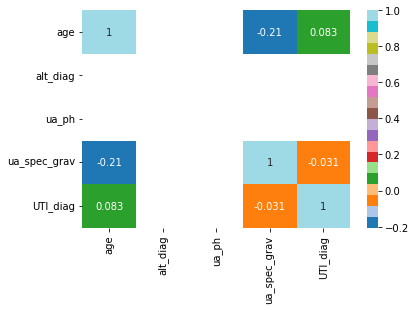

In [82]:
ax = sns.heatmap(df_orig_2[['age', 'alt_diag', 'ua_ph', 'ua_spec_grav', 'UTI_diag']].corr(), cmap="tab20", annot=True)

# Analysis: 

**White Space Indicates Bad Correlation**

**1. Urine Analysis Specific Gravity has the highest negative correlation with our Target Variable. Meaning it impacts the target variable the most out of all numeric attributes.**

**2. Age and ua_ph have very bad correlation and so it is represented using a white row and column.** 



<AxesSubplot:xlabel='age', ylabel='Density'>

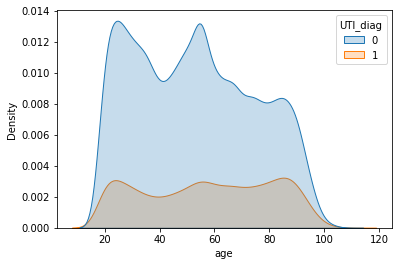

In [83]:
sns.kdeplot(data=df_orig_2, x='age', hue='UTI_diag', fill=True)

# Analysis:

**Age feature has more contribution towards not being diagnosed with UTI.**

# Splitting Data into Contributing Factors (x) and Target Variable (y)

In [16]:
x = df_orig_2.drop('UTI_diag', axis=1)
y = df_orig_2['UTI_diag']

In [17]:
x.head()

,,UCX_abnormal,ua_bacteria,ua_bili,ua_blood,ua_clarity,ua_color,ua_epi,ua_glucose,ua_ketones,ua_leuk,...,Monocytes,MPV,Neutrophils,Platelets,Potassium,RBC,RDW,Sodium,WBC,alt_diag
ID,PATID,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,2,2,0,5,4,2,3,4,...,4.0,1.0,5.0,1.5,1.0,1.0,1.0,1.0,1.0,0
2,1,0,1,2,4,0,5,4,2,3,2,...,4.0,2.0,5.0,2.0,1.0,1.0,2.0,2.0,3.0,0
3,2,1,0,2,2,0,5,4,2,3,4,...,4.0,1.0,5.0,3.0,1.0,1.0,4.0,1.0,1.0,0
4,3,1,1,2,2,1,5,4,2,3,0,...,4.0,2.0,5.0,1.5,1.0,5.0,2.0,2.0,4.0,0
5,4,0,3,4,2,0,2,4,2,5,4,...,4.0,2.0,5.0,2.0,1.0,1.0,2.0,4.0,4.0,0


In [18]:
y.head()

ID  PATID
1   1        1
2   1        1
3   2        0
4   3        1
5   4        0
Name: UTI_diag, dtype: int64

# Normalization and Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 1.84298026, -0.61061685, -0.20227105, ..., -1.45155368,
        -0.97905719,  0.        ],
       [-0.54259941,  0.09242468, -0.20227105, ..., -0.49375249,
         0.29419391,  0.        ],
       [ 1.84298026, -0.61061685, -0.20227105, ..., -1.45155368,
        -0.97905719,  0.        ],
       ...,
       [-0.54259941, -0.61061685, -0.20227105, ..., -0.49375249,
         0.29419391,  0.        ],
       [ 1.84298026, -0.61061685, -0.20227105, ..., -1.45155368,
        -0.34243164,  0.        ],
       [ 1.84298026,  0.79546621, -3.67328457, ...,  1.90075049,
        -0.34243164,  0.        ]])

# Dry Run of Model Building

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=30)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy*100)

Accuracy:  83.80395571588505


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Principal Component Analysis

In [24]:
from sklearn.decomposition import PCA

pca = PCA(0.95)

x_pca = pca.fit_transform(x_scaled)

explained_variance = pca.explained_variance_ratio_
components = pca.n_components_
print("Explained Variance: ", explained_variance)
print("Number of Components After PCA: ", components)

[0.05515135 0.03435759 0.02967958 0.02798341 0.0271312  0.02596888
 0.02263764 0.01920798 0.01779173 0.01475869 0.01446678 0.01290032
 0.01208628 0.01158707 0.01068607 0.01018731 0.00985606 0.00945766
 0.00923509 0.00880355 0.00851916 0.00817707 0.00815423 0.00774577
 0.00762499 0.00752335 0.00735087 0.0072389  0.00703891 0.0069409
 0.00687021 0.00674811 0.00669221 0.00651687 0.00639879 0.00635223
 0.00630862 0.00629318 0.00618884 0.00612135 0.00604824 0.006005
 0.00593375 0.00589901 0.0058303  0.00577357 0.00573159 0.00570545
 0.00567313 0.00564046 0.00562333 0.00560766 0.0055878  0.00554326
 0.00553779 0.00549911 0.00548048 0.0054593  0.00542243 0.00538381
 0.00537255 0.00535589 0.00534374 0.00529626 0.00527443 0.00527246
 0.00525505 0.0051916  0.00515427 0.00513733 0.00510259 0.00509532
 0.00505382 0.00503523 0.00501164 0.00498975 0.00496252 0.0049404
 0.00488859 0.00486945 0.00479938 0.00478602 0.00476444 0.00473177
 0.00471934 0.00467516 0.00462532 0.00460839 0.0045914  0.00455842

# Model Building

# Random Forest Classifier

In [25]:
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=30)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train_pca, y_train)
y_pred = rf.predict(x_test_pca)
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy_rf*100,"%")

82.23037691255132 %


# Light Gradient Boosting Machine Classifier (LGBM) 

In [54]:
import lightgbm as lgb

lgclf = lgb.LGBMClassifier(max_depth=20, num_leaves=30, learning_rate=0.1, n_estimators=2500)
lgclf.fit(x_train_pca, y_train)
y_pred=lgclf.predict(x_test_pca)
accuracy_lgb = accuracy_score(y_test, y_pred)
print(accuracy_lgb*100,"%")

84.46324169672846 %


# Extreme Gradient Boosting Classifier (XGBoost)

In [28]:
from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth=15, learning_rate=0.1, n_estimators=1000)
xgb.fit(x_train_pca, y_train)
y_pred = xgb.predict(x_test_pca)
accuracy_xg = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy_xg*100,"%")

84.48190073392213 %


# Model Evaluation

[Text(0.5, 0, 'Models'), Text(0, 0.5, 'Accuracy')]

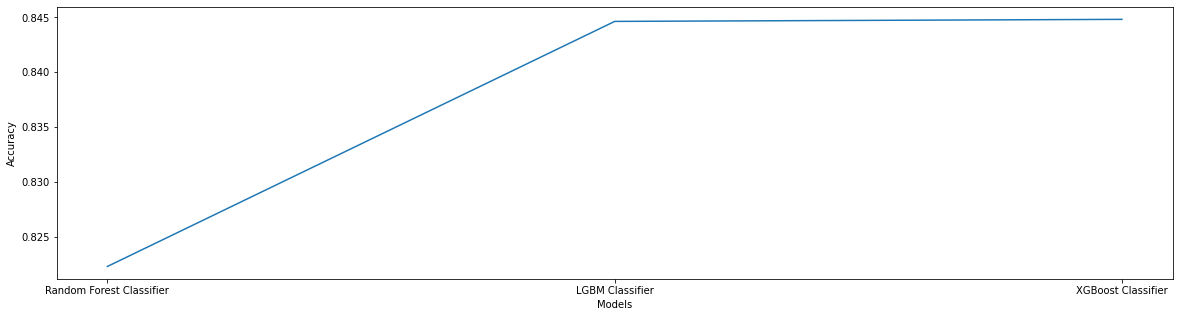

In [84]:
plt.figure(figsize=(20,5))
models = ['Random Forest Classifier', 'LGBM Classifier', 'XGBoost Classifier']
ax = sns.lineplot(x=models, y=[accuracy_rf, accuracy_lgb, accuracy_xg])
ax.set(xlabel='Models', ylabel='Accuracy')

# Analysis: 

**XGBoost and LGBM models have performed the best with XGBoost performing slightly better.**